# **Importing Packages**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import re
import nltk 
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Reading Data**

In [2]:
data = pd.read_excel('/content/drive/MyDrive/IntelliTech-DataSet/training_set_rel3.xlsx')
data.head(15)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1,"Dear @LOCATION1, I think that computers have a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1,Did you know that more and more people these d...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1,@PERCENT1 of people agree that computers make ...,5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1,"Dear reader, @ORGANIZATION1 has had a dramatic...",4.0,5.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,1,In the @LOCATION1 we have the technology of a ...,5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

In [4]:
unique_essay = data["essay_set"].unique()
unique_essay

array([1, 2, 3, 4, 5, 6, 7, 8])

# **Exploratory Data Analysis**

## Checking Duplicate Values

In [53]:
duplicate = data[data.duplicated(['essay_id'])]
duplicate

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,word_list,word_count


**Analysis**: No Duplicates Found

## Checking Missing Values

In [48]:
# Checking Missing Values
missing = data.isnull().sum()

# Finding percentage of missing value
total_cells = np.product(data.shape)
percent = (missing.sum() / total_cells)*100
percent

66.2647043715005

**Analysis**: Missing values is due to absence of expert rater(R3) and trait wise (Rubrics) scoring  in most of the examples.

## Number of Essays in each set

In [5]:
essay_in_each_set = data["essay_set"].value_counts()
print(essay_in_each_set)

5    1805
2    1800
6    1800
1    1783
4    1772
3    1726
7    1569
8     723
Name: essay_set, dtype: int64


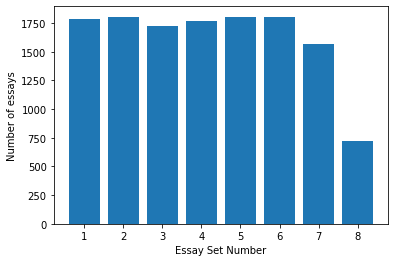

In [6]:
fig , ax  = plt.subplots()
ax.bar([5,2,6,1,4,3,7,8] , essay_in_each_set)
ax.set_xlabel("Essay Set Number")
ax.set_ylabel("Number of essays")
plt.show()

## Couting Words Per Essay

  Excluding Stop Words

Word Tokenization and Pre Processing

In [43]:
def TextPreprocessing(content):
    """
    Removes encodings, numbers and etc from content. 
    Lowercases the content and Splits it into tokens 

    Args:
      content: Essay of each student

    Returns:
      String[]

    """
    content = re.sub('[^a-zA-Z]',' ',content)   
    content = content.lower()
    content = content.split()
    content = [word for word in content if not word in stopwords.words('english')]
    return content

data['word_list'] = data['essay'].apply(TextPreprocessing)
data['word_list']

0        [dear, local, newspaper, think, effects, compu...
1        [dear, caps, caps, believe, using, computers, ...
2        [dear, caps, caps, caps, people, use, computer...
3        [dear, local, newspaper, caps, found, many, ex...
4        [dear, location, know, computers, positive, ef...
                               ...                        
12973    [stories, mothers, daughters, either, enemies,...
12974    [never, understood, meaning, laughter, shortes...
12975    [laugh, caps, habit, caps, cause, causes, laug...
12976    [trippin, fences, num, years, young, short, nu...
12977    [many, people, believe, laughter, improve, lif...
Name: word_list, Length: 12978, dtype: object

Counting Words Per Essay

In [44]:
data['word_count'] = [len(words) for words in data['word_list']]
data['word_count']

0        166
1        224
2        136
3        302
4        224
        ... 
12973    417
12974    275
12975    400
12976    251
12977    223
Name: word_count, Length: 12978, dtype: int64

Histogram of Essay Set vs Word Count

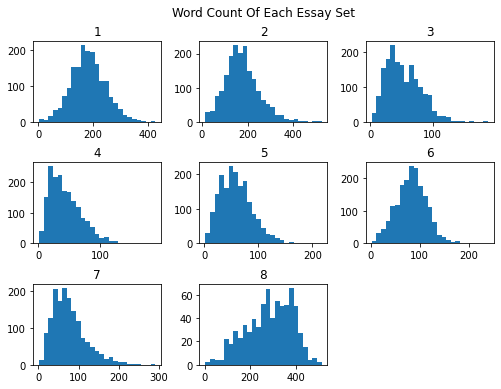

In [47]:
data.hist(column='word_count', by='essay_set', bins=25, figsize=(8,6), rot=0) 
plt.suptitle('Word Count Of Each Essay Set')
plt.xlabel('Number Of Words')
plt.show()

## Working With Data Set

*   Essay 01:
        1.   Rater 1 Score
        2.   Rater 2 Score
        3.   Domain 1 Score

*   Essay 02: 
        1.   Rater 1 Domain 1 Score
        2.   Rater 2 Domain 1 Score
        3.   Domain 1 Score
        4.   Rater 1 Domain 2 Score
        5.   Rater 2 Domain 2 Score
        6.   Domain 2 Score

*   Essay 03: 
        1.  Rater 1 Score 
        2.  Rater 2 Score 
        3.  Domain 1 Score

*   Essay 04: 
        1.  Rater 1 Score
        2.  Rater 2 Score
        3.  Domain 1 Score

*   Essay 05: 
        1.  Rater 1 Score 
        2.  Rater 2 Score 
        3.  Domain 1 Score

*   Essay 06: 
        1.  Rater 1 Score 
        2.  Rater 2 Score 
        3.  Domain 1 Score

*   Essay 07: 
        1.  Rater 1 Score
        2.  Rater 2 Score
        3.  Domain 1 Score
        4.  Rater 1 Trait 1  
        5.  Rater 1 Trait 2 
        6.  Rater 1 Trait 3 
        7.  Rater 1 Trait 4 
        8.  Rater 2 Trait 1 
        9.  Rater 2 Trait 2
        10. Rater 2 Trait 3 
        11. Rater 2 Trait 4

*   Essay 08: 
        1.  Rater 1 Score 
        2.  Rater 2 Score 
        3.  Rater 3 Score
        4.  Domain 1 Score 
        5.  Rater 1 Trait 1 
        6.  Rater 1 Trait 2 
        7.  Rater 1 Trait 3 
        8.  Rater 1 Trait 4 
        9.  Rater 1 Trait 5 
        10. Rater 1 Trait 6 
        11. Rater 2 Trait 1 
        12. Rater 2 Trait 2 
        13. Rater 2 Trait 3 
        14. Rater 2 Trait 4 
        15. Rater 2 Trait 5 
        16. Rater 2 Trait 6 
        17. Rater 3 Trait 1
        18. Rater 3 Trait 2 
        19. Rater 3 Trait 3 
        20. Rater 3 Trait 4
        21. Rater 3 Trait 5 
        22. Rater 3 Trait 6 




## Working on Essay Set 01

In [75]:
DataFrame_EssaySet_1 = data.query('essay_set == 1')

Cleaning Data Frame

In [76]:
DataFrame_EssaySet_1 = DataFrame_EssaySet_1[["essay_id" , "essay" , "rater1_domain1" , "rater2_domain1" , "domain1_score"]]
DataFrame_EssaySet_1.set_axis(["ID" , "Essay" , "Rater_1 Score" , "Rater_2 Score" , "Total Score"] , axis = 1, inplace = True)
DataFrame_EssaySet_1.to_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet01.csv" , index = False);

## Working on Essay Set 02

In [84]:
DataFrame_EssaySet_2 = data.query('essay_set == 2')
DataFrame_EssaySet_2.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
1783,2978,2,Certain materials being removed from libraries...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,NaN,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,2980,2,Do you think that libraries should remove cert...,2.0,3.0,NaN,2.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1786,2981,2,"In @DATE1's world, there are many things found...",4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1787,2982,2,In life you have the 'offensive things'. The l...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning Data Frame

In [78]:
DataFrame_EssaySet_2 = DataFrame_EssaySet_2[["essay_id" , "essay" , "rater1_domain1" , "rater2_domain1" , "domain1_score" , "rater1_domain2" , "rater2_domain2" , "domain2_score"] ]
DataFrame_EssaySet_2.set_axis(["ID" , "Essay" , "Rater_1 Domain_1 Score" , "Rater_2 Domain_1 Score" , "Total Score_Domain1" , "Rater_1 Domain_2 Score" , "Rater_2 Domain_2 Score", "Total Score_Domain2"] , axis = 1, inplace = True)
DataFrame_EssaySet_2.to_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet02.csv" , index = False);

## Working on Essay Set 03

In [83]:
DataFrame_EssaySet_3 = data.query('essay_set == 3')
DataFrame_EssaySet_3.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
3583,5978,3,The features of the setting affect the cyclist...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3584,5979,3,The features of the setting affected the cycli...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3585,5980,3,Everyone travels to unfamiliar places. Sometim...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3586,5981,3,I believe the features of the cyclist affected...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3587,5982,3,The setting effects the cyclist because of the...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning Data Frame

In [80]:
DataFrame_EssaySet_3 = DataFrame_EssaySet_3[["essay_id" , "essay" , "rater1_domain1" , "rater2_domain1" , "domain1_score"]]
DataFrame_EssaySet_3.set_axis(["ID" , "Essay" , "Rater_1 Score" , "Rater_2 Score" , "Total Score"] , axis = 1, inplace = True)
DataFrame_EssaySet_3.to_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet03.csv" , index = False);

## Working on Essay Set 04

In [8]:
DataFrame_EssaySet_4 = data.query('essay_set == 4')
DataFrame_EssaySet_4.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
5309,8863,4,The author concludes the story with this becau...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,8864,4,The narrater has that in with Paragraph becuse...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,8865,4,The author concludes the story with that passa...,3.0,2.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,8866,4,The author ended the story with this paragraph...,1.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,8867,4,The author concludes the story with this parag...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning Data Frame

In [9]:
DataFrame_EssaySet_4 = DataFrame_EssaySet_4[["essay_id" , "essay" , "rater1_domain1" , "rater2_domain1" , "domain1_score"]]
DataFrame_EssaySet_4.set_axis(["ID" , "Essay" , "Rater_1 Score" , "Rater_2 Score" , "Total Score"] , axis = 1, inplace = True)
DataFrame_EssaySet_4.to_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet04.csv" , index = False);

## Working on Essay Set 05

In [12]:
DataFrame_EssaySet_5 = data.query('essay_set == 5')
DataFrame_EssaySet_5.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
7081,11827,5,"In this memoir of Narciso Rodriguez, @PERSON3'...",2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7082,11828,5,Throughout the excerpt from Home the Blueprint...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7083,11829,5,The mood the author created in the memoir is l...,3.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7084,11830,5,The mood created by the author is showing how ...,1.0,0.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7085,11831,5,The mood created in the memoir is happiness an...,2.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning Data Frame

In [13]:
DataFrame_EssaySet_5 = DataFrame_EssaySet_5[["essay_id" , "essay" , "rater1_domain1" , "rater2_domain1" , "domain1_score"]]
DataFrame_EssaySet_5.set_axis(["ID" , "Essay" , "Rater_1 Score" , "Rater_2 Score" , "Total Score"] , axis = 1, inplace = True)
DataFrame_EssaySet_5.to_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet05.csv" , index = False);

## Working on Essay Set 06

In [16]:
DataFrame_EssaySet_6 = data.query('essay_set == 6')
DataFrame_EssaySet_6.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
8886,14834,6,There were many obstacles that the builders fa...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8887,14835,6,"Him from the start, there would have been many...",3.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8888,14836,6,The builders of the Empire State Building face...,3.0,4.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8889,14837,6,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8890,14838,6,The builders of the Empire State Building face...,3.0,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning Data Frame

In [17]:
DataFrame_EssaySet_6 = DataFrame_EssaySet_6[["essay_id" , "essay" , "rater1_domain1" , "rater2_domain1" , "domain1_score"]]
DataFrame_EssaySet_6.set_axis(["ID" , "Essay" , "Rater_1 Score" , "Rater_2 Score" , "Total Score"] , axis = 1, inplace = True)
DataFrame_EssaySet_6.to_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet06.csv" , index = False);

## Working on Essay Set 07

In [20]:
DataFrame_EssaySet_7 = data.query('essay_set == 7')
DataFrame_EssaySet_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 10686 to 12254
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        1569 non-null   int64  
 1   essay_set       1569 non-null   int64  
 2   essay           1569 non-null   object 
 3   rater1_domain1  1569 non-null   float64
 4   rater2_domain1  1569 non-null   float64
 5   rater3_domain1  0 non-null      float64
 6   domain1_score   1569 non-null   float64
 7   rater1_domain2  0 non-null      float64
 8   rater2_domain2  0 non-null      float64
 9   domain2_score   0 non-null      float64
 10  rater1_trait1   1569 non-null   float64
 11  rater1_trait2   1569 non-null   float64
 12  rater1_trait3   1569 non-null   float64
 13  rater1_trait4   1569 non-null   float64
 14  rater1_trait5   0 non-null      float64
 15  rater1_trait6   0 non-null      float64
 16  rater2_trait1   1569 non-null   float64
 17  rater2_trait2   1569 non-nul

Cleaning Data Frame

In [21]:
DataFrame_EssaySet_7 = DataFrame_EssaySet_7[["essay_id" , "essay" , "rater1_domain1" , "rater2_domain1" , "domain1_score" , "rater1_trait1" , "rater1_trait2" , "rater1_trait3" , "rater1_trait4" , "rater2_trait1" , "rater2_trait2" , "rater2_trait3" , "rater2_trait4"]]
DataFrame_EssaySet_7.set_axis(["ID" , "Essay" , "Rater_1 Score" , "Rater_2 Score" , "Domain 1 Total Score" , "Rater 1 Trait 1" , "Rater 1 Trait 2", "Rater 1 Trait 3", "Rater 1 Trait 4", "Rater 2 Trait 1", "Rater 2 Trait 2", "Rater 2 Trait 3", "Rater 2 Trait 4" ] , axis = 1, inplace = True)
DataFrame_EssaySet_7.to_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet07.csv" , index = False);

## Working on Essay Set 08

In [33]:
DataFrame_EssaySet_8 = data.query('essay_set == 8')
DataFrame_EssaySet_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 12255 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        723 non-null    int64  
 1   essay_set       723 non-null    int64  
 2   essay           723 non-null    object 
 3   rater1_domain1  723 non-null    float64
 4   rater2_domain1  723 non-null    float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   723 non-null    float64
 7   rater1_domain2  0 non-null      float64
 8   rater2_domain2  0 non-null      float64
 9   domain2_score   0 non-null      float64
 10  rater1_trait1   723 non-null    float64
 11  rater1_trait2   723 non-null    float64
 12  rater1_trait3   723 non-null    float64
 13  rater1_trait4   723 non-null    float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   723 non-null    float64
 17  rater2_trait2   723 non-null 

Cleaning Data Frame

In [34]:
DataFrame_EssaySet_8.drop(["essay_set" , "rater1_domain2" , "rater2_domain2" , "domain2_score"] , axis = 1 , inplace = True)
DataFrame_EssaySet_8.set_axis(["ID" , "Essay" , "Rater_1 Score" , "Rater_2 Score" , "Rater_3 Score" , "Domain 1 Total Score" , "Rater 1 Trait 1" , "Rater 1 Trait 2", "Rater 1 Trait 3", "Rater 1 Trait 4", "Rater 1 Trait 5", "Rater 1 Trait 6", "Rater 2 Trait 1", "Rater 2 Trait 2", "Rater 2 Trait 3", "Rater 2 Trait 4", "Rater 2 Trait 5", "Rater 2 Trait 6", "Rater 3 Trait 1", "Rater 3 Trait 2", "Rater 3 Trait 3", "Rater 3 Trait 4", "Rater 3 Trait 5", "Rater 3 Trait 6" ] , axis = 1, inplace = True)
DataFrame_EssaySet_8.to_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet08.csv" , index = False);

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Raters Average In Each Essay Set

### Domain Wise Average

Domain 01

In [ ]:
mean_rater1_domain1 = []
for i in range (1,9):
  mean_rater1_domain1.append(data[data["essay_set"] == i]["domain1_score"].mean())

mean_rater1_domain1

[8.528323051037576,
 3.4155555555555557,
 1.8482039397450754,
 1.4313946922642575,
 2.4088642659279778,
 2.72,
 16.062460165710643,
 36.95020746887967]

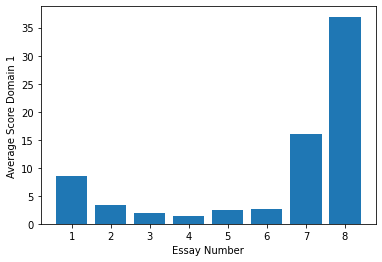

In [ ]:
fig , ax  = plt.subplots()
ax.bar([1,2,3,4,5,6,7,8], mean_rater1_domain1)
ax.set_xlabel("Essay Number")
ax.set_ylabel("Average Score Domain 1")
plt.show()